In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [6]:
len(os.listdir('../input/standard-ocr-dataset/data/testing_data/'))

36

In [11]:
img =  load_img('../input/standard-ocr-dataset/data/testing_data/0/28310.png',target_size=(64,64))

In [3]:
path = '../input/standard-ocr-dataset/data/training_data'
images = []
labels = []
for folders in tqdm(os.listdir(path)):
    folder = os.path.join(path,folders)
    for file in os.listdir(folder):
        img_path = os.path.join(folder,file)
        img = load_img(img_path,target_size=(64,64))
        img = img_to_array(img,dtype='uint8')
        images.append(img)
        labels.append(folders)

  0%|          | 0/36 [00:00<?, ?it/s]

In [4]:
len(images),len(labels)

(20628, 20628)

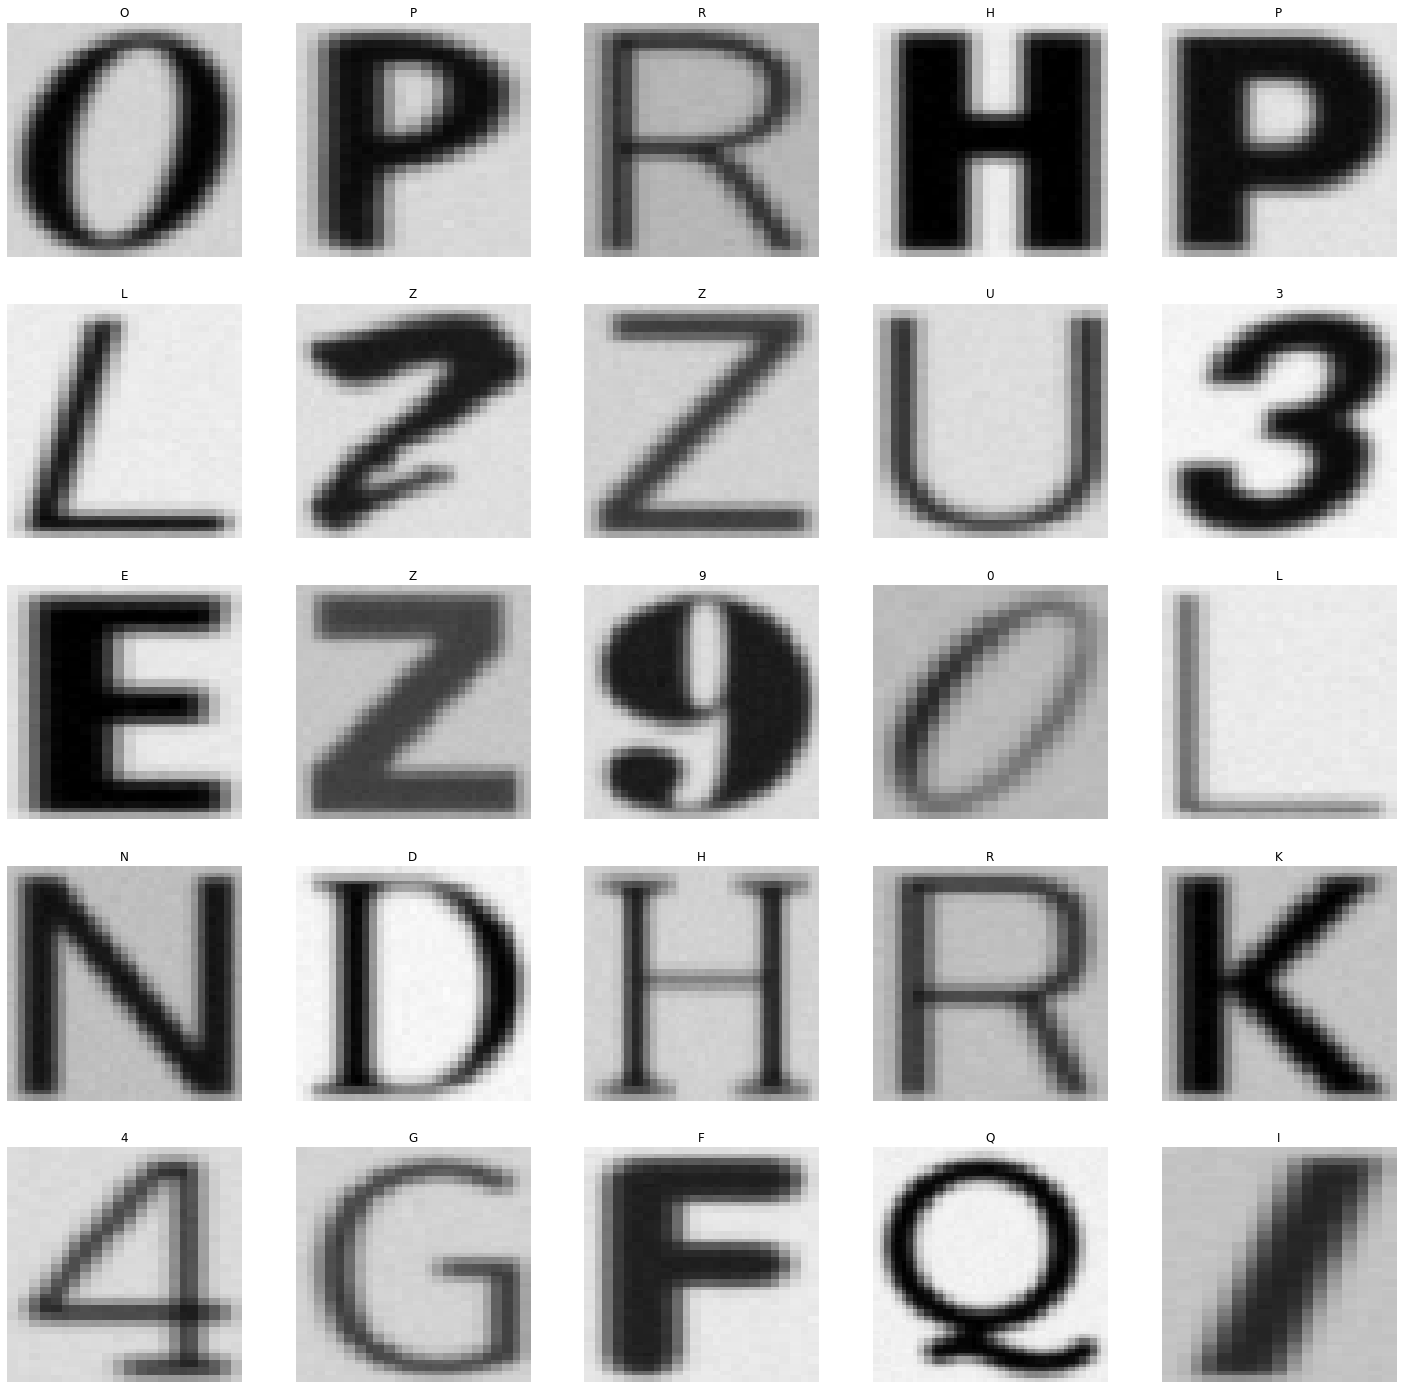

In [5]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    
    random = np.random.choice(range(20628))
    plt.imshow(images[random])
    plt.title(labels[random])
    plt.axis('off')

In [6]:
import pandas as pd

y = pd.get_dummies(labels)

In [7]:
names = y.columns

In [8]:
label = y.to_numpy()

In [9]:
names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

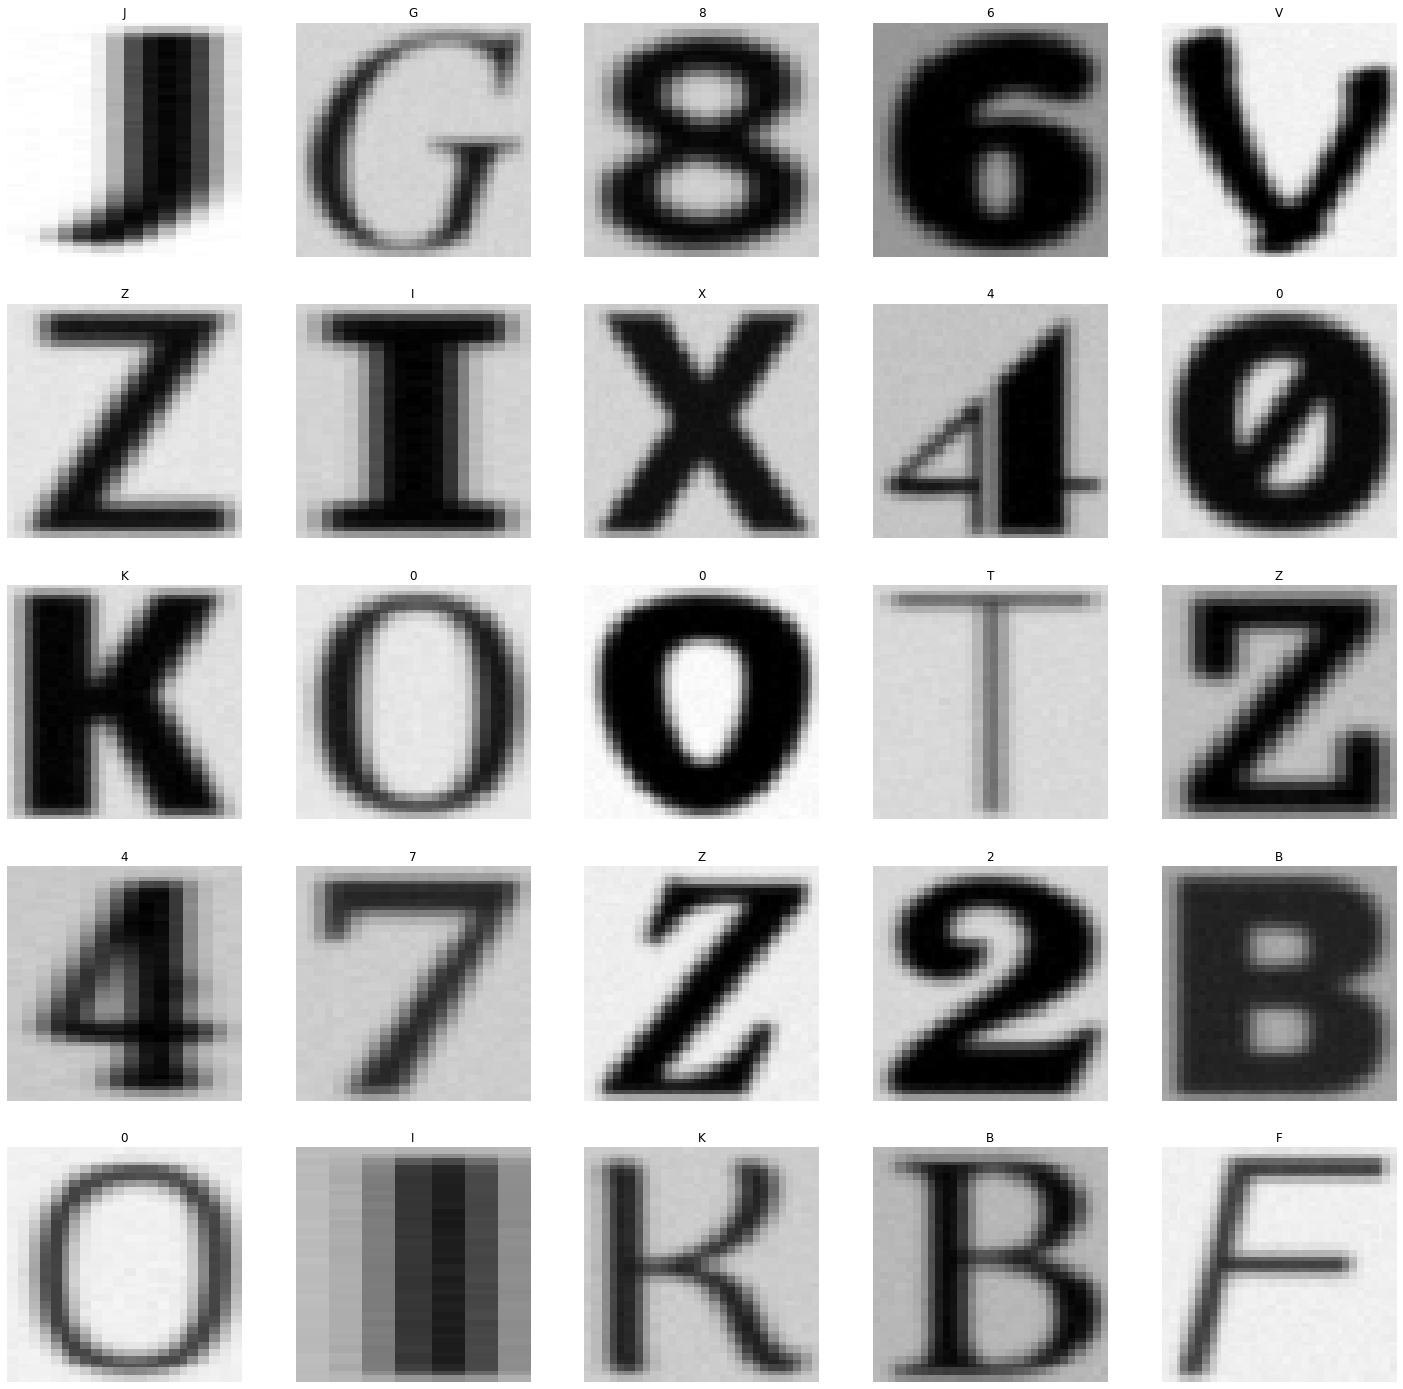

In [10]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    
    random = np.random.choice(range(20628))
    plt.imshow(images[random])
    plt.title(names[np.argmax(label[random])])
    plt.axis('off')

In [11]:
images = np.array(images)
labels = np.array(label)

In [12]:
images = images/255

In [13]:
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D())

model.add((Conv2D(64,(3,3),activation='relu')))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(36,activation='softmax'))

2022-09-15 11:55:18.227706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 11:55:18.363754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 11:55:18.364594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 11:55:18.366341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [22]:
model.fit(images,labels,epochs=20,batch_size=64,validation_data=(test_images,test_labels))

2022-09-15 11:55:48.324987: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1013907456 exceeds 10% of free system memory.
2022-09-15 11:55:49.453826: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1013907456 exceeds 10% of free system memory.
2022-09-15 11:55:50.291860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-09-15 11:55:51.935220: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


323/323 [==============================] - 11s 10ms/step - loss: 0.4899 - accuracy: 0.8791 - val_loss: 0.9575 - val_accuracy: 0.7788
Epoch 2/20
323/323 [==============================] - 3s 8ms/step - loss: 0.1618 - accuracy: 0.9523 - val_loss: 0.1316 - val_accuracy: 0.9563
Epoch 3/20
323/323 [==============================] - 3s 8ms/step - loss: 0.1141 - accuracy: 0.9642 - val_loss: 0.0692 - val_accuracy: 0.9772
Epoch 4/20
323/323 [==============================] - 3s 8ms/step - loss: 0.0843 - accuracy: 0.9721 - val_loss: 0.0355 - val_accuracy: 0.9921
Epoch 5/20
323/323 [==============================] - 3s 8ms/step - loss: 0.0683 - accuracy: 0.9764 - val_loss: 0.0717 - val_accuracy: 0.9762
Epoch 6/20
323/323 [==============================] - 3s 8ms/step - loss: 0.0628 - accuracy: 0.9783 - val_loss: 0.0628 - val_accuracy: 0.9772
Epoch 7/20
323/323 [==============================] - 3s 8ms/step - loss: 0.0543 - accuracy: 0.9815 - val_loss: 0.0653 - val_accuracy: 0.9692
Epoch 8/20
323/

In [16]:
path = '../input/standard-ocr-dataset/data/testing_data'
test_images = []
test_labels = []
for folders in tqdm(os.listdir(path)):
    folder = os.path.join(path,folders)
    for file in os.listdir(folder):
        img_path = os.path.join(folder,file)
        img = load_img(img_path,target_size=(64,64))
        img = img_to_array(img,dtype='uint8')
        test_images.append(img)
        test_labels.append(folders)

  0%|          | 0/36 [00:00<?, ?it/s]

In [17]:
len(test_images),len(test_labels)

(1008, 1008)

In [18]:
y = pd.get_dummies(test_labels)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_labels = y.to_numpy()

In [20]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [21]:
test_images = test_images/255

In [23]:
model.evaluate(test_images,test_labels)

32/32 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9921


[0.019709430634975433, 0.9920634627342224]

In [24]:
model.save('ocr.h5')